# Distribuicao de medicamentos para Covid19

https://opendatasus.saude.gov.br/dataset/distribuicao-de-medicamentos-covid-19

In [1]:
#importando bibliotecas 
import pandas as pd

In [4]:
df = pd.read_excel(r'atualizacao-de-medicamentos.xlsx')

df.head()

,REGIÃO,UF,DESTINATARIO,LOCALIDADE,ITEM,PROGRAMA DE SAÚDE,QUANTIDADE,STATUS,DATA DE ENTREGA,VALOR UNITÁRIO,VALOR TOTAL
0,NORDESTE,ALAGOAS,SES,ALAGOAS,DIFOSFATO DE CLOROQUINA 150MG,COVID-19,-350000.0,REMANEJAMENTO,2020-09-04,0.0,0.0
1,NORDESTE,MARANHÃO,SES,MARANHÃO,DIFOSFATO DE CLOROQUINA 150MG,COVID-19,-180000.0,REMANEJAMENTO,2020-09-04,0.0,0.0
2,NORDESTE,PARAÍBA,SES,PARAÍBA,DIFOSFATO DE CLOROQUINA 150MG,COVID-19,-40000.0,REMANEJAMENTO,2020-09-04,0.0,0.0
3,CENTRO-OESTE,DISTRITO FEDERAL,SES,DISTRITO FEDERAL,DIFOSFATO DE CLOROQUINA 150MG,COVID-19,-10000.0,REMANEJAMENTO,2020-09-04,0.0,0.0
4,NORDESTE,RIO GRANDE DO NORTE,SES,RIO GRANDE DO NORTE,DIFOSFATO DE CLOROQUINA 150MG,COVID-19,-7000.0,REMANEJAMENTO,2020-09-04,0.0,0.0


In [5]:
#Tipos dos registros
df.dtypes

REGIÃO                       object
UF                           object
DESTINATARIO                 object
LOCALIDADE                   object
ITEM                         object
PROGRAMA DE SAÚDE            object
QUANTIDADE                  float64
STATUS                       object
DATA DE ENTREGA      datetime64[ns]
VALOR UNITÁRIO              float64
VALOR TOTAL                 float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   REGIÃO             916 non-null    object        
 1   UF                 916 non-null    object        
 2   DESTINATARIO       916 non-null    object        
 3   LOCALIDADE         916 non-null    object        
 4   ITEM               916 non-null    object        
 5   PROGRAMA DE SAÚDE  916 non-null    object        
 6   QUANTIDADE         915 non-null    float64       
 7   STATUS             916 non-null    object        
 8   DATA DE ENTREGA    916 non-null    datetime64[ns]
 9   VALOR UNITÁRIO     916 non-null    float64       
 10  VALOR TOTAL        916 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 78.8+ KB


In [7]:
#Análise estatistica basica do dataframe
df.describe()

,QUANTIDADE,VALOR UNITÁRIO,VALOR TOTAL
count,915.000000,916.000000,9.160000e+02
mean,30905.486339,2.434138,9.730465e+04
std,85110.905229,1.770961,3.358164e+05
min,-350000.000000,0.000000,0.000000e+00
25%,2000.000000,0.069000,1.000000e+03
50%,7000.000000,3.000000,1.171500e+04
75%,23750.000000,4.000000,5.050000e+04
max,750000.000000,5.330000,3.750000e+06


In [8]:
#Análise de amostras
df.sample(5)

,REGIÃO,UF,DESTINATARIO,LOCALIDADE,ITEM,PROGRAMA DE SAÚDE,QUANTIDADE,STATUS,DATA DE ENTREGA,VALOR UNITÁRIO,VALOR TOTAL
770,CENTRO-OESTE,MATO GROSSO DO SUL,SMS,CAMPO GRANDE,FOSFATO DE OSELTAMIVIR 30MG,INFLUENZA,5000.0,ENTREGA REALIZADA,2020-10-26,2.0,10000.0
353,NORTE,PARÁ,SES,PARÁ,FOSFATO DE OSELTAMIVIR 75MG,INFLUENZA,7000.0,ENTREGA REALIZADA,2020-04-24,4.0,28000.0
33,CENTRO-OESTE,MATO GROSSO,SMS,CLÁUDIA,DIFOSFATO DE CLOROQUINA 150MG,COVID-19,4500.0,ENTREGA REALIZADA,2020-08-28,0.0,0.0
481,NORDESTE,RIO GRANDE DO NORTE,SES,RIO GRANDE DO NORTE,FOSFATO DE OSELTAMIVIR 30MG,INFLUENZA,3130.0,ENTREGA REALIZADA,2020-04-16,2.0,6260.0
41,NORDESTE,ALAGOAS,SMS,CAMPO ALEGRE,DIFOSFATO DE CLOROQUINA 150MG,COVID-19,5500.0,ENTREGA REALIZADA,2020-08-24,0.0,0.0


In [9]:
#Tipos de medicamentos
df['ITEM'].unique()

array(['DIFOSFATO DE CLOROQUINA 150MG', 'FOSFATO DE OSELTAMIVIR 30MG',
       'FOSFATO DE OSELTAMIVIR 45MG', 'FOSFATO DE OSELTAMIVIR 75MG',
       'FOSFATO DE OSELTAMIVIR 30MG ', 'HIDROXICLOROQUINA 200MG ',
       'FOSFATO DE OSELTAMIVIR 75MG '], dtype=object)

In [10]:
df['ITEM'].nunique()

7

In [11]:
len(df['ITEM'])

916

In [16]:
df['ITEM'].value_counts()

FOSFATO DE OSELTAMIVIR 75MG      282
DIFOSFATO DE CLOROQUINA 150MG    236
FOSFATO DE OSELTAMIVIR 45MG      183
FOSFATO DE OSELTAMIVIR 30MG      134
FOSFATO DE OSELTAMIVIR 30MG       54
HIDROXICLOROQUINA 200MG           25
FOSFATO DE OSELTAMIVIR 75MG        2
Name: ITEM, dtype: int64

In [20]:
#Quantidade de medicamentos distribuidos por UF
df.groupby(['UF', 'ITEM'])['QUANTIDADE'].sum()

UF         ITEM                         
ACRE       DIFOSFATO DE CLOROQUINA 150MG    174500.0
           FOSFATO DE OSELTAMIVIR 30MG        3150.0
           FOSFATO DE OSELTAMIVIR 30MG       31010.0
           FOSFATO DE OSELTAMIVIR 45MG       32500.0
           FOSFATO DE OSELTAMIVIR 75MG      149500.0
                                              ...   
TOCANTINS  DIFOSFATO DE CLOROQUINA 150MG     43000.0
           FOSFATO DE OSELTAMIVIR 30MG         500.0
           FOSFATO DE OSELTAMIVIR 30MG        9000.0
           FOSFATO DE OSELTAMIVIR 45MG        5500.0
           FOSFATO DE OSELTAMIVIR 75MG       30500.0
Name: QUANTIDADE, Length: 173, dtype: float64

In [22]:
#Visualização da tabela de colunas com string
df.select_dtypes('object')

,REGIÃO,UF,DESTINATARIO,LOCALIDADE,ITEM,PROGRAMA DE SAÚDE,STATUS
0,NORDESTE,ALAGOAS,SES,ALAGOAS,DIFOSFATO DE CLOROQUINA 150MG,COVID-19,REMANEJAMENTO
1,NORDESTE,MARANHÃO,SES,MARANHÃO,DIFOSFATO DE CLOROQUINA 150MG,COVID-19,REMANEJAMENTO
2,NORDESTE,PARAÍBA,SES,PARAÍBA,DIFOSFATO DE CLOROQUINA 150MG,COVID-19,REMANEJAMENTO
3,CENTRO-OESTE,DISTRITO FEDERAL,SES,DISTRITO FEDERAL,DIFOSFATO DE CLOROQUINA 150MG,COVID-19,REMANEJAMENTO
4,NORDESTE,RIO GRANDE DO NORTE,SES,RIO GRANDE DO NORTE,DIFOSFATO DE CLOROQUINA 150MG,COVID-19,REMANEJAMENTO
...,...,...,...,...,...,...,...
911,NORTE,AMAZONAS,SMS,MANAUS,HIDROXICLOROQUINA 200MG,COVID-19,ENTREGA REALIZADA
912,SUDESTE,MINAS GERAIS,SMS,DIVINOLANDIA DE MINAS,HIDROXICLOROQUINA 200MG,COVID-19,ENTREGA REALIZADA
913,SUDESTE,MINAS GERAIS,SMS,FORTUNA DE MINAS,HIDROXICLOROQUINA 200MG,COVID-19,ENTREGA REALIZADA
914,SUDESTE,MINAS GERAIS,SMS,MATENA,HIDROXICLOROQUINA 200MG,COVID-19,ENTREGA REALIZADA


In [24]:
#Visualização nome das colunas tipo string
df.select_dtypes('object').columns

Index(['REGIÃO', 'UF', 'DESTINATARIO', 'LOCALIDADE', 'ITEM',
       'PROGRAMA DE SAÚDE', 'STATUS'],
      dtype='object')

In [28]:
#Remove espacos em branco dos textos

for registro in df.select_dtypes('object').columns:
    df[registro] = df[registro].str.strip()
    
print("Removido espaço em branco dos textos")

Removido espaço em branco dos textos


In [29]:
#Quantidade de medicamentos por UF
df['UF'].value_counts()

MATO GROSSO            70
RIO GRANDE DO SUL      48
MINAS GERAIS           48
SANTA CATARINA         44
BAHIA                  42
CEARÁ                  42
AMAZONAS               41
PARÁ                   41
ACRE                   39
SÃO PAULO              37
MATO GROSSO DO SUL     35
PARANÁ                 35
GOIÁS                  34
RONDÔNIA               33
RORAIMA                30
ALAGOAS                29
PARAÍBA                28
PIAUÍ                  28
RIO GRANDE DO NORTE    27
ESPÍRITO SANTO         27
PERNAMBUCO             25
RIO DE JANEIRO         25
SERGIPE                23
DISTRITO FEDERAL       22
MARANHÃO               22
AMAPA                  22
TOCANTINS              19
Name: UF, dtype: int64

<AxesSubplot:>

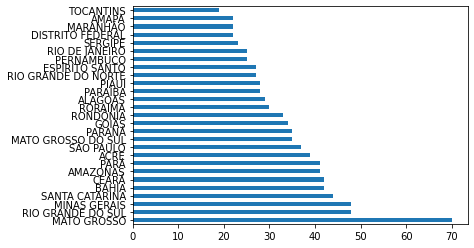

In [31]:
#Exibir grafico da distribuição de medicamentos por UF
%matplotlib inline
df['UF'].value_counts().plot.barh()

In [32]:
#Analise de programa de saude para COVID19
df[df['PROGRAMA DE SAÚDE'] == 'COVID-19']['UF'].value_counts()

MATO GROSSO            34
RIO GRANDE DO SUL      30
MINAS GERAIS           18
SANTA CATARINA         17
RORAIMA                14
GOIÁS                  12
BAHIA                  11
SÃO PAULO               9
ALAGOAS                 8
PARANÁ                  8
ESPÍRITO SANTO          7
RIO GRANDE DO NORTE     7
AMAZONAS                7
MATO GROSSO DO SUL      7
ACRE                    7
PIAUÍ                   6
PERNAMBUCO              6
PARAÍBA                 6
PARÁ                    6
RIO DE JANEIRO          6
RONDÔNIA                6
CEARÁ                   5
AMAPA                   5
MARANHÃO                5
TOCANTINS               5
DISTRITO FEDERAL        5
SERGIPE                 4
Name: UF, dtype: int64

<AxesSubplot:>

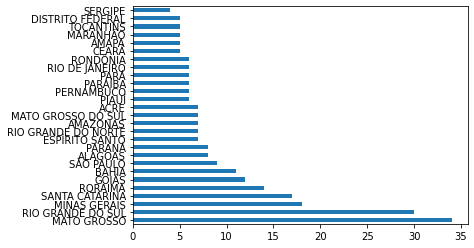

In [33]:
df[df['PROGRAMA DE SAÚDE'] == 'COVID-19']['UF'].value_counts().plot.barh()

In [36]:
#Verificar onde a quantidade é nula
df[df['QUANTIDADE'].isnull()]

,REGIÃO,UF,DESTINATARIO,LOCALIDADE,ITEM,PROGRAMA DE SAÚDE,QUANTIDADE,STATUS,DATA DE ENTREGA,VALOR UNITÁRIO,VALOR TOTAL
731,NORDESTE,PIAUÍ,SMS,TERESINA,FOSFATO DE OSELTAMIVIR 45MG,INFLUENZA,NaN,ENTREGA REALIZADA,2020-09-14,3.0,0.0
